<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/DEP_Customer_Churn_Prediction_Project/blob/main/DEP_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [98]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [99]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5000,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0
9213,9214,15672216,Uvarov,584,France,Female,40,4,82441.75,1,0,0,80852.11,0
7074,7075,15752139,Salter,682,Germany,Male,36,5,72373.62,2,1,0,36895.99,0
7645,7646,15698522,Thomas,660,Germany,Male,39,9,134599.33,2,1,0,183095.87,0
4942,4943,15784687,Simmons,592,France,Male,36,1,126477.42,1,0,0,179718.17,0


In [100]:
df.shape

(10000, 14)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [103]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [106]:
df["Gender"] = df['Gender'].map({'Male': 0, 'Female': 1})
df["Geography"] = df["Geography"].map({'France': 0, 'Germany': 1, 'Spain': 2})

In [107]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4090,4091,15681220,Chou,503,0,1,37,8,0.00,2,1,1,97893.32,0
9803,9804,15776558,Nicholls,673,0,0,31,1,108345.22,1,0,1,38802.03,0
7055,7056,15621546,Yuriev,620,0,1,33,9,127638.35,1,1,1,192717.57,0
3704,3705,15753213,Lees,604,0,1,34,7,0.00,2,1,0,193021.49,0
1640,1641,15661528,Ashbolt,583,2,0,47,5,102562.23,1,1,0,92708.10,0


In [108]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [109]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1074,535,0,1,31,7,111855.04,2,1,1,36278.89,0
6696,567,0,1,48,3,0.00,1,1,0,55362.45,0
656,549,2,0,25,6,193858.20,1,0,1,21600.11,0
3944,612,0,1,31,8,117989.76,1,1,1,54129.86,0
4140,841,1,1,33,7,154969.79,2,1,1,99505.75,0


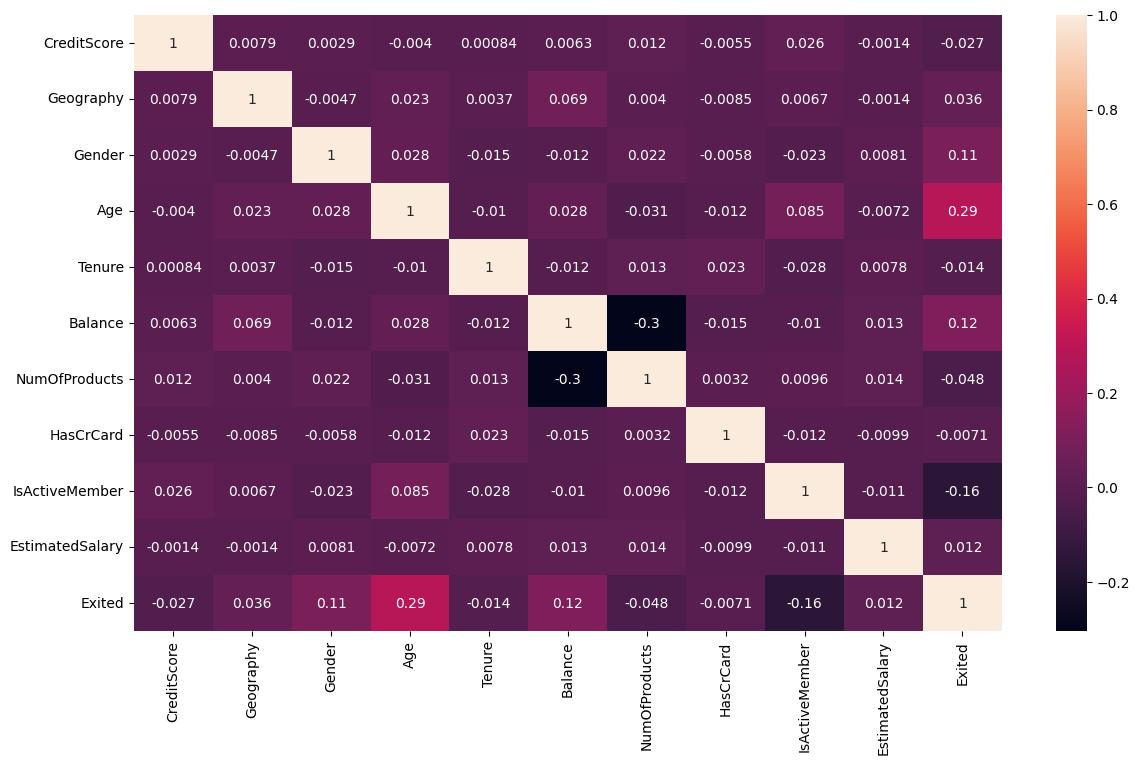

In [110]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True);

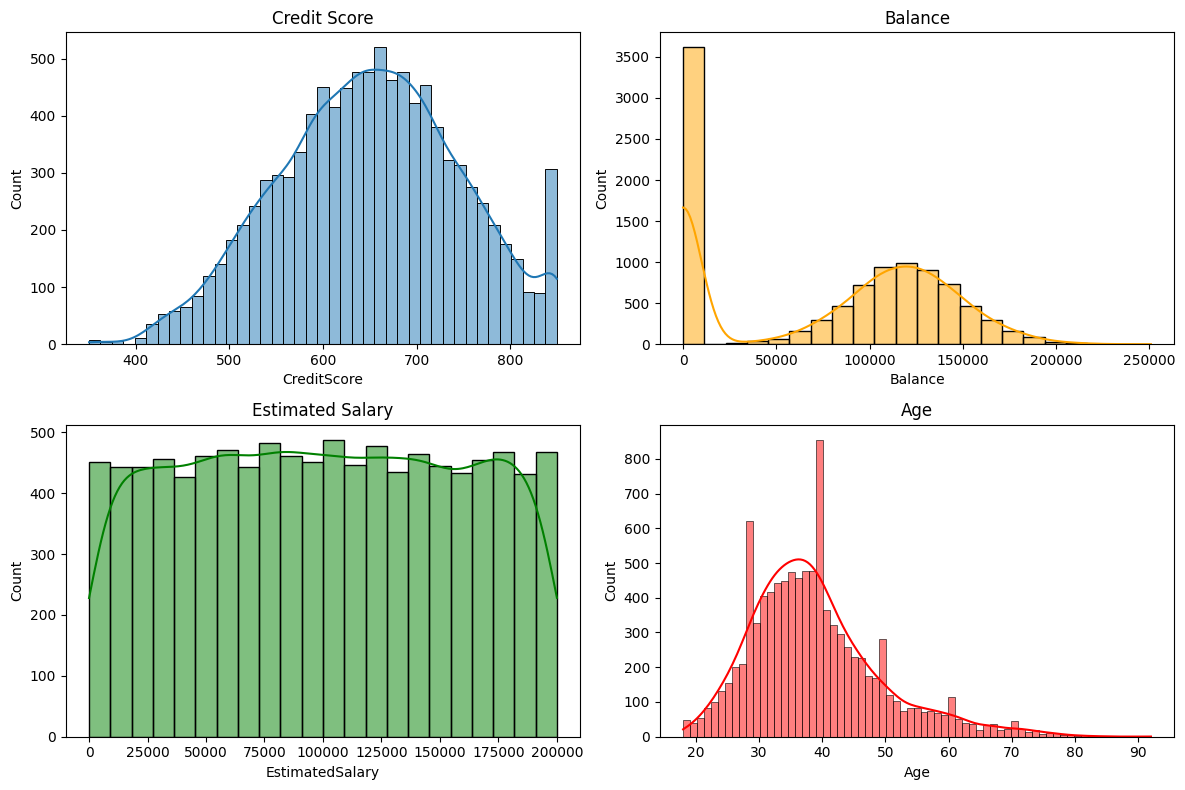

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['CreditScore'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Credit Score')

sns.histplot(df['Balance'], kde=True, color='orange', ax=axs[0, 1])
axs[0, 1].set_title('Balance')

sns.histplot(df['EstimatedSalary'], kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Estimated Salary')

sns.histplot(df['Age'], kde=True, color='red', ax=axs[1, 1])
axs[1, 1].set_title('Age')

plt.tight_layout()
plt.show()

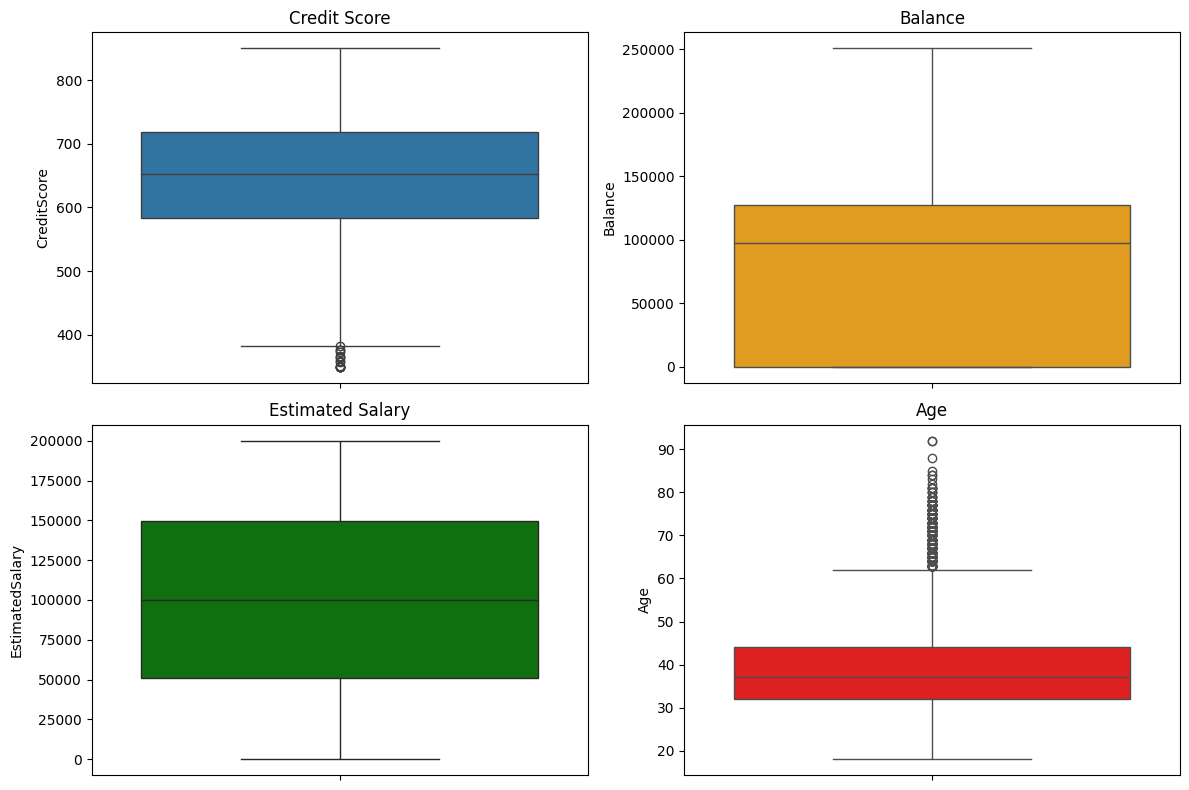

In [112]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(df['CreditScore'], ax=axs[0, 0])
axs[0, 0].set_title('Credit Score')

sns.boxplot(df['Balance'], color='orange', ax=axs[0, 1])
axs[0, 1].set_title('Balance')

sns.boxplot(df['EstimatedSalary'], color='green', ax=axs[1, 0])
axs[1, 0].set_title('Estimated Salary')

sns.boxplot(df['Age'], color='red', ax=axs[1, 1])
axs[1, 1].set_title('Age')

plt.tight_layout()
plt.show()

In [114]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ["Balance", "CreditScore", "EstimatedSalary", "Age"]:
    df = remove_outliers(df, col)

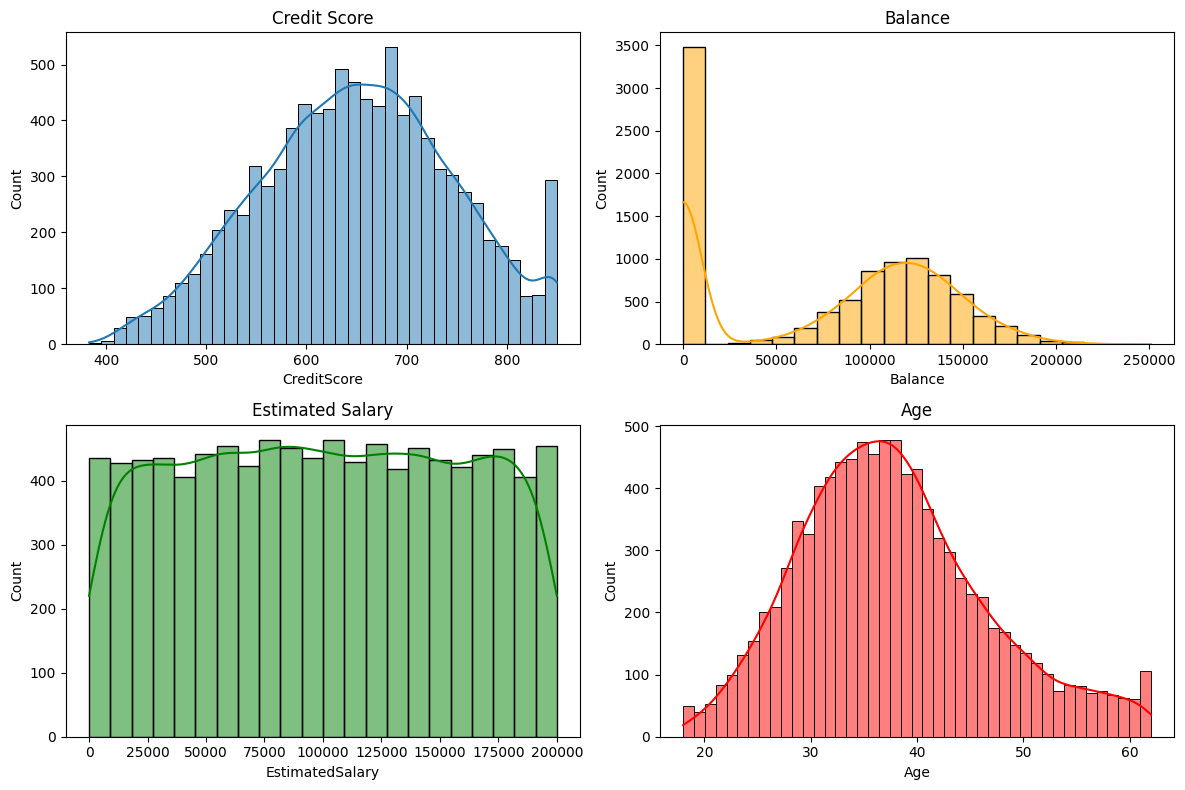

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['CreditScore'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Credit Score')

sns.histplot(df['Balance'], kde=True, color='orange', ax=axs[0, 1])
axs[0, 1].set_title('Balance')

sns.histplot(df['EstimatedSalary'], kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Estimated Salary')

sns.histplot(df['Age'], kde=True, color='red', ax=axs[1, 1])
axs[1, 1].set_title('Age')

plt.tight_layout()
plt.show()

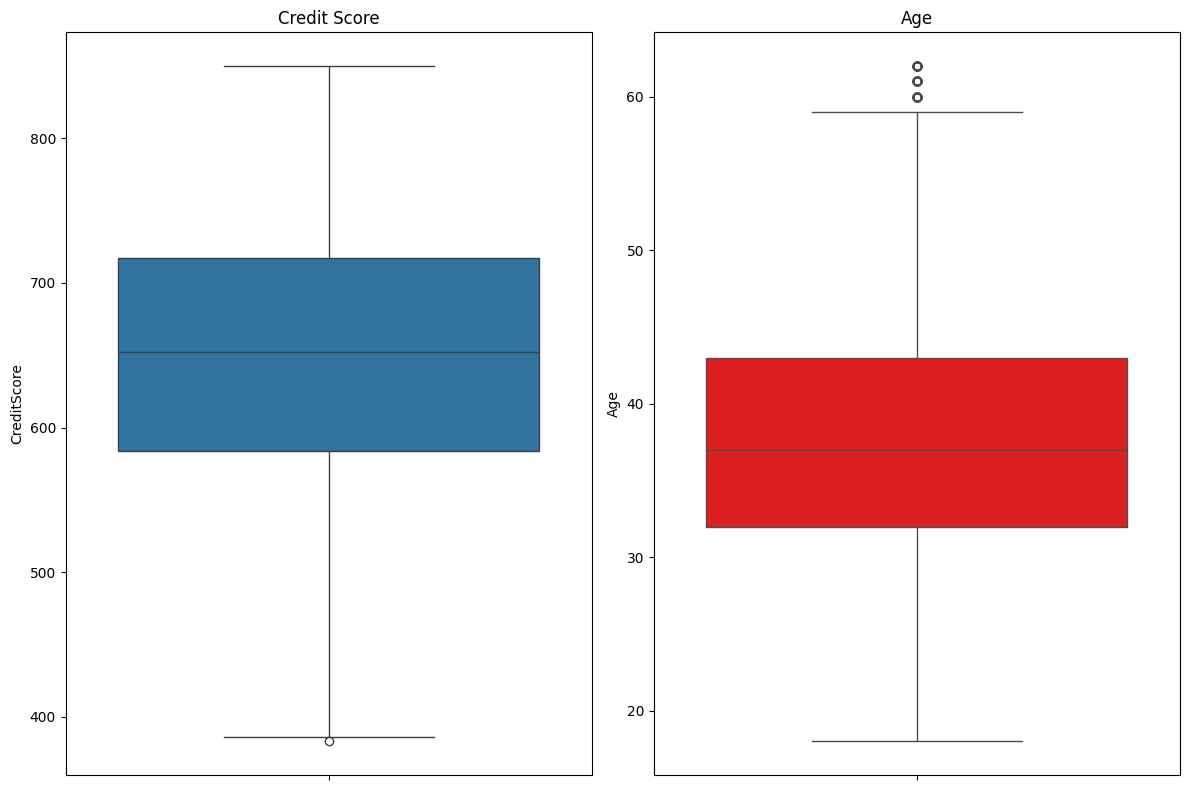

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(df['CreditScore'], ax=axs[0])
axs[0].set_title('Credit Score')

sns.boxplot(df['Age'], color='red', ax=axs[1])
axs[1].set_title('Age')

plt.tight_layout()
plt.show()

In [124]:
scaler = MinMaxScaler()
df[["CreditScore", "Balance", "EstimatedSalary", "Age"]] = scaler.fit_transform(df[["CreditScore", "Balance", "EstimatedSalary", "Age"]])

In [125]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4115,0.421842,0,1,0.113636,5,0.454064,2,0,0,0.981243,0
1098,0.871520,0,1,0.181818,4,0.564300,2,0,0,0.491535,0
3740,0.569593,0,0,0.613636,7,0.000000,2,0,1,0.375999,0
5498,0.385439,0,0,0.386364,3,0.423482,1,0,0,0.197693,0
979,0.357602,0,1,0.636364,7,0.000000,2,1,0,0.652956,0


In [136]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

In [138]:
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

In [139]:
print(f'Logistic Regression CV Scores: {lr_scores.mean()}')
print(f'Random Forest CV Scores: {rf_scores.mean()}')

Logistic Regression CV Scores: 0.8203896103896104
Random Forest CV Scores: 0.8618181818181819


In [141]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8592938733125649
Precision: 0.8269230769230769
Recall: 0.4226044226044226
F1 Score: 0.5593495934959349
ROC AUC: 0.6994523100513884
